In [14]:
import os
import numpy as np
import pandas as pd

from sklearn import config_context
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
import daal4py.sklearn
daal4py.sklearn.patch_sklearn()

from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm2

dispatcher.py:151: FutureWarning: 
Scikit-learn patching with daal4py is deprecated and will be removed in the future.
Use Intel(R) Extension for Scikit-learn* module instead (pip install scikit-learn-intelex).
To enable patching, please use one of the following options:
1) From the command line:
    python -m sklearnex <your_script>
2) From your script:
    from sklearnex import patch_sklearn
    patch_sklearn()
Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [17]:
df = pd.read_csv('tree_recommender.csv')

In [18]:
# ML - training and inference
import time
from sklearn.preprocessing import LabelEncoder

time_start = time.time()
clf = lm2.Ridge()

mse_values, cod_values = [], []
N_RUNS = 50
TRAIN_SIZE = 0.9
random_state = 777

# Extract the input and target columns
X = df[['soil', 'temperature']]
y = df['trees']

# Perform one-hot encoding on the "soil" column
onehot_encoder = OneHotEncoder()
ct = ColumnTransformer([("soil", onehot_encoder, [0])])
X = ct.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(y)

for i in range(N_RUNS):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE,
                                                        random_state=random_state)    
    random_state += 777
    
    #model = LogisticRegression()
    
    with config_context(assume_finite=True):
        model=clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(y_test)
    y_p = le.fit_transform(y_pred)
    
    mse_values.append(mean_squared_error(y_enc, y_p))
    cod_values.append(r2_score(y_enc, y_p))
time_daal = time.time()-time_start
time_start = time.time()        
print(time_daal)   



0.1275191307067871


In [19]:
mean_mse = sum(mse_values)/len(mse_values)
mean_cod = sum(cod_values)/len(cod_values)
mse_dev = pow(sum([(mse_value - mean_mse)**2 for mse_value in mse_values])/(len(mse_values) - 1), 0.5)
cod_dev = pow(sum([(cod_value - mean_cod)**2 for cod_value in cod_values])/(len(cod_values) - 1), 0.5)
print("mean MSE ± deviation: {:.9f} ± {:.9f}".format(mean_mse, mse_dev))
print("mean COD ± deviation: {:.9f} ± {:.9f}".format(mean_cod, cod_dev))

mean MSE ± deviation: 22.365000000 ± 6.454047623
mean COD ± deviation: -1.550247039 ± 0.448288415


In [20]:
%store -r time_nodaal

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

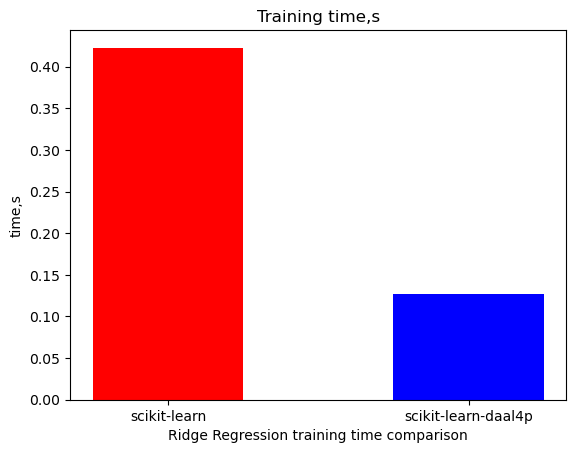

speedup: 3.3160357779880116


In [22]:
left = [1,2]
pred_times = [time_nodaal,time_daal ]
tick_label = ['scikit-learn', 'scikit-learn-daal4p']
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['red', 'blue'])
plt.xlabel('Ridge Regression training time comparison'); plt.ylabel('time,s'); plt.title('Training time,s')
plt.show()
print("speedup:",time_nodaal/time_daal)